![Electric Vehicle Population!](ElectVehicleCover.png "Electric Vehicle Population EDA By Azam  Bukhari")

# About Author
- Project: Electric Vehicles Population, United Sates
- Author: Azam Bukhari
- Code Submission Date: 25-03-2023
- Author's Contact Info:\
[Email](azam.bukhari@gmail.com)\
[Github](https://github.com/AzamBukhari)\
[kaggle](https://www.kaggle.com/azambukhari)\
[Linkedin](https://www.linkedin.com/in/azambukhari)\
[twitter](https://twitter.com/AzamBukhari1)\
[Medium](https://medium.com/@azam.bukhari)

# About Data
- Data: This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).
- Data can be downloadd from this link: 🔗 [*link*]( https://www.kaggle.com/datasets/ssarkar445/electric-vehicle-population)
## Task:
We intend to conduct Exploratory Data Analysis (EDA) on the given dataset. The EDA will serve as the basis for the necessary Data Wrangling activities to be carried out for the purposes of data cleaning and normalization.\
During the coding process, we will document our observations. Eventually, we will produce a summary and draw conclusions from our findings.

## Objectives:
The primary aim of this project is to conduct a thorough analysis of the dataset to identify significant insights.\
This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL). We set our objective to forumalte a rationale between Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles Population

We will perform EDA on the subject dataset and try to observe and study the dynamics involved in churn transformation.


## Kernel Version Used:
- Python 3.11.1

# *Import Libraries*
- We will use the follwoing libraries
1. Pandas: Data manipulation and analysis library.
2. Numpy: Numerical computing library.
3. Matplotlib: Data visualization library.
4. Seaborn: Statistical data visualization library.
5. Scipy:  To provide a comprehensive set of numerical algorithms and tools for scientific computing in Python.
6. Shapely: Shapely is a BSD-licensed Python package for manipulation and analysis of planar geometric objects
7. GeoPandas: To make working with geospatial data in python easier

---

# Glossary / Data Dictionary / Important Terms

- 'VIN (1-10)': The 1st 10 characters of each vehicle's Vehicle Identification Number (VIN).
- 'County': The county in which the registered owner resides.
- 'City': The city in which the registered owner resides
- 'State': The state in which the registered owner resides
- 'Postal Code': The 5 digit zip code in which the registered owner resides
- 'Model Year': The model year of the vehicle, determined by decoding the Vehicle Identification Number (VIN)
- 'Make': The manufacturer of the vehicle, determined by decoding the Vehicle Identification Number (VIN)
- 'Model': The model of the vehicle, determined by decoding the Vehicle Identification Number (VIN).
- 'Electric Vehicle Type': This distinguishes the vehicle as all electric or a plug-in hybrid.
- 'Clean Alternative Fuel Vehicle (CAFV) Eligibility': This categorizes vehicle as Clean Alternative Fuel Vehicles (CAFVs) based on the fuel requirement and electric-only range requirement in House Bill 2042 as passed in the 2019 legislative session.

- 'Electric Range': Describes how far a vehicle can travel purely on its electric charge.
- 'Base MSRP': This is the lowest Manufacturer's Suggested Retail Price (MSRP) for any trim level of the model in question.
- 'Legislative District': The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.
- 'DOL Vehicle ID': Unique number assigned to each vehicle by Department of Licensing for identification purposes.
- 'Vehicle Location': The center of the ZIP Code for the registered vehicle.
- 'Electric Utility': This is the electric power retail service territories serving the address of the registered vehicle. All ownership types for areas in Washington are included: federal, investor owned, municipal, political subdivision, and cooperative. If the address for the registered vehicle falls into an area with overlapping electric power retail service territories then a single pipe | delimits utilities of same TYPE and a double pipe || delimits utilities of different types. We combined vehicle address and Homeland Infrastructure Foundation Level Database (HIFLD) Retail_Service_Territories feature layer using a geographic information system to assign values for this field. Blanks occur for vehicles with addresses outside of Washington or for addresses falling into areas in Washington not containing a mapped electric power retail service territory in the source data.

- '2020 Census Tract': The census tract identifier is a combination of the state, county, and census tract codes as assigned by the United States Census Bureau in the 2020 census, also known as Geographic Identifier (GEOID)

In [2]:
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# for scientific and statistical computing
import scipy as sp
#To make working with geospatial data in python easier
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

plt.style.use('ggplot')



# Data Loading, Exploration & Wrangling

We will proceed as follow:
1. Load the csv file with the pandas
2. Creating the dataframe and understanding the data present in the dataset
3. Dealing with the missing data and the incorrect records

In [3]:
# Load dataset Telco_Churn
df = pd.read_csv("Electric_Vehicle_Population.csv")

### Analysing & describing the dataset

This code snippet helps us to get a complete overview of our data by adjusting a key display setting in Pandas.
By setting the option to show all columns, you can ensure that no valuable information is overlooked when working with dataframes. 
Whether you're exploring data, conducting analyses or simply trying to get a better sense of your data, this simple line of code can make a big difference.

In [4]:
pd.set_option('display.max_columns', None)

### Get a sneak peek of our data
With just a single line of code! Quickly view the top rows of your dataset to get a sense of what you're working with, without having to scroll through the entire file.

In [5]:
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3MW5P9J05N,Arapahoe,Englewood,CO,80111.0,2022,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,200589147,POINT (-104.89239 39.61914),NaN,8.005007e+09
1,5YJXCBE27J,Island,Greenbank,WA,98253.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,10.0,326880081,POINT (-122.575569 48.08489),NaN,5.302997e+10
2,1N4AZ0CP3F,Kings,Lemoore,CA,93245.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,NaN,182237457,POINT (-119.78637 36.30101),NaN,6.031980e+09
3,5YJ3E1EA8J,San Diego,Oceanside,CA,92051.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,153998050,NaN,NaN,6.073019e+09
4,5YJ3E1EB1K,Alameda,Berkeley,CA,94710.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,320914072,POINT (-122.300531 37.869271),NaN,6.001423e+09


### View the column names

In [6]:
df.columns.unique()

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

### View the shape of the dataset

In [7]:
df.shape

(109481, 17)


### Observation Number 1

Upon initial viewing of the data, it has come to our attention towards the relevance or irrelavnce of particular columns:

1. VIN (1-10): It is a unique identifier or index. 
2. Postal Code: is stored as float format., we need to convert that into integer
3. Base MSRP: The lowest Manufacturer's Suggested Retail Price (MSRP), a very important column however we need to see the health of this column if it has been populated or not
4. Model Year, Make, Model: are already all presented by decoding the VIN (1-10) id., 
5. Electric Utility: represents Electric Retail Services. | represnets service provider from same vendors, || service provider from multiple vendors, Blank represents Not Available
6. Few column names are with spaces. We will rename these columns:
   1. Postal Code
   2. Model Year
   3. Electric Vehicle Type
   4. Clean Alternative Fuel Vehicle (CAFV) Eligibility
   5. Electric Range
   6. Base MSRP
   7. Legislative District
   8. DOL Vehicle ID
   9. Vehicle Location
   10. Electric Utility
   11. 2020 Census Tract
   

We Can present the information stored in the Electric Utility: |, || and blank as:\
However, before any renaming. We will see the health of the attribute in terms of NULL values
- Single Type Utility
- Multi type Utility
- Not Available
  
These columns may be purged at later stage of this analysis (if required)
- Base MSRP
- Legislative District

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109481 entries, 0 to 109480
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         109481 non-null  object 
 1   County                                             109480 non-null  object 
 2   City                                               109480 non-null  object 
 3   State                                              109481 non-null  object 
 4   Postal Code                                        109480 non-null  float64
 5   Model Year                                         109481 non-null  int64  
 6   Make                                               109481 non-null  object 
 7   Model                                              109474 non-null  object 
 8   Electric Vehicle Type                              109481 non-null  object

### Descriptive Statistics
We use descriptive statistics to summarize and understand the key features of dataset.

In [9]:
df.describe().style.background_gradient(cmap='Blues')

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,109480.000000,109481.000000,109481.000000,109481.000000,109205.000000,109481.000000,109480.000000
mean,98157.012943,2018.899197,90.211425,1849.194609,29.824120,198447551.859601,52968493402.103012
std,2640.605503,2.872853,102.575715,10946.085012,14.679959,95617186.541589,1675103687.859588
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4777.000000,1101001400.000000
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,146731322.000000,53033008500.000000
50%,98121.000000,2019.000000,35.000000,0.000000,34.000000,187411808.000000,53033029304.000000
75%,98370.000000,2021.000000,208.000000,0.000000,43.000000,216917571.000000,53053072506.000000
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,479254772.000000,56033000100.000000


### Missing values in the data

In [10]:
df.isnull().sum().sort_values(ascending = False)

Electric Utility                                     428
Legislative District                                 276
Vehicle Location                                      25
Model                                                  7
2020 Census Tract                                      1
City                                                   1
Postal Code                                            1
County                                                 1
Base MSRP                                              0
DOL Vehicle ID                                         0
VIN (1-10)                                             0
Electric Range                                         0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Make                                                   0
Model Year                                             0
State                                                  0
Electric Vehicle Type                                  0
dtype: int64

## **Exploratory Analysis and Visualization**

Text(0.5, 1.0, 'Missing null values')

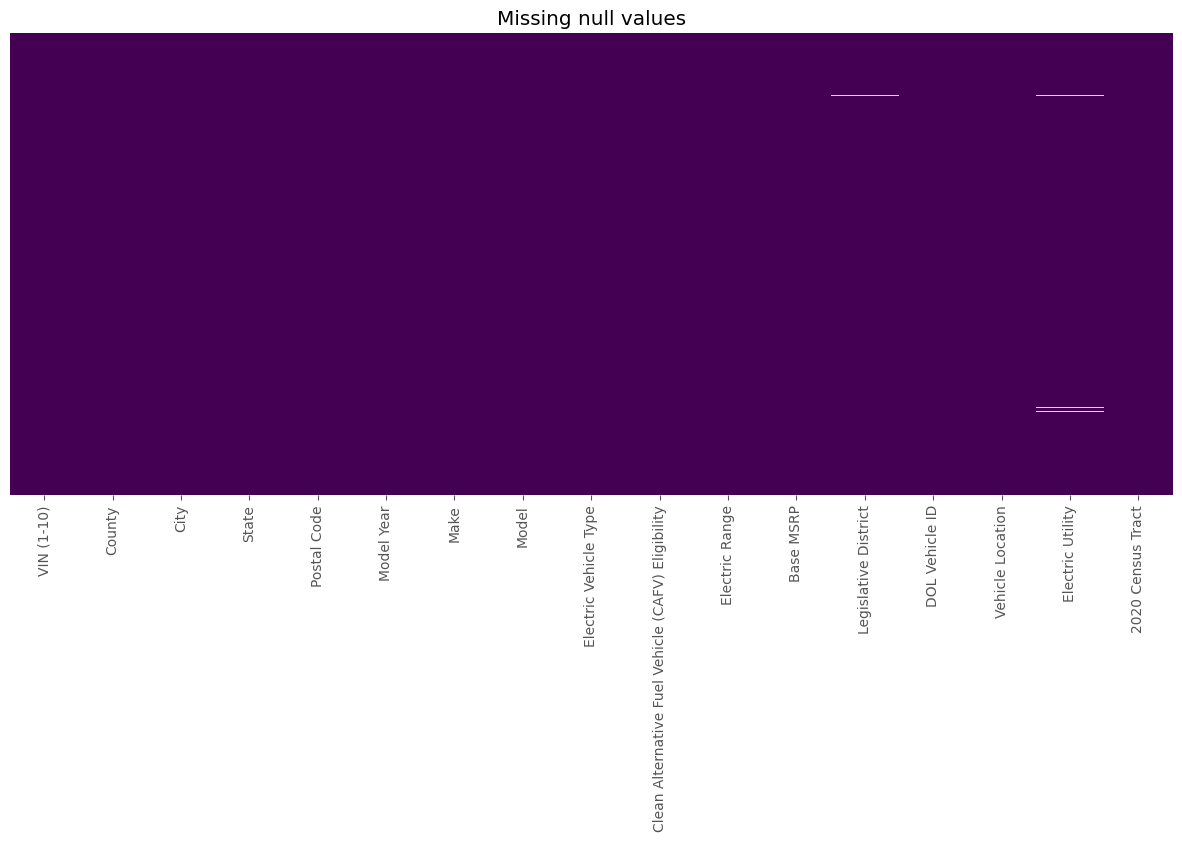

In [11]:
plt.rcParams['figure.figsize'] = (15,6)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

> **Figure-1:** Provide us the visual on the missing values in a dataframe 'df'

In [12]:
# #### Get a clearer picture of missing data with this nifty code snippet! See the percentage of null values in our dataset sorted in ascending order,
# making it easy to identify which features have the most missing data.
missing_percentage = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage

Electric Utility                                     0.390935
Legislative District                                 0.252099
Vehicle Location                                     0.022835
Model                                                0.006394
2020 Census Tract                                    0.000913
City                                                 0.000913
Postal Code                                          0.000913
County                                               0.000913
Base MSRP                                            0.000000
DOL Vehicle ID                                       0.000000
VIN (1-10)                                           0.000000
Electric Range                                       0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Make                                                 0.000000
Model Year                                           0.000000
State                                                0.000000
Electric

### Observation Number 2

> Dealing with the null values

- Electric Utility: null values will be filled with text 'Utility Not Avalilable'
- Legislative District: null values will be filled with text 'Unknown'
- Vehicle Location: null values will be filled with text 'Unknown'
- Model: null values will be filled with text 'Unknown'
- 2020 Census Tract: null values will be filled with text 'Unknown'
- City: null values will be filled with text 'Unknown'
- Postal Code: null values will be filled with mean()
- County: null values will be filled with text 'Unknown'

In [13]:
df['Electric Utility'] = df['Electric Utility'].fillna('Utility Not Avalilable')
df['Legislative District'] = df['Legislative District'].fillna('Unknown')
df['Vehicle Location'] = df['Vehicle Location'].fillna('Unknown')
df['Model'] = df['Model'].fillna('Unknown')
df['2020 Census Tract'] = df['2020 Census Tract'].fillna('Unknown')
df['City'] = df['City'].fillna('Unknown')

# fill null values in the 'Postal Code' column with the mean salary
mean_postcode = df['Postal Code'].mean()
df['Postal Code'] = df['Postal Code'].fillna(mean_postcode)


df['County'] = df['County'].fillna('Unknown')

In [14]:
# #### Get a clearer picture of missing data with this nifty code snippet! See the percentage of null values in our dataset sorted in ascending order,
# making it easy to identify which features have the most missing data.
missing_percentage1 = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage1

VIN (1-10)                                           0.0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.0
Electric Utility                                     0.0
Vehicle Location                                     0.0
DOL Vehicle ID                                       0.0
Legislative District                                 0.0
Base MSRP                                            0.0
Electric Range                                       0.0
Electric Vehicle Type                                0.0
County                                               0.0
Model                                                0.0
Make                                                 0.0
Model Year                                           0.0
Postal Code                                          0.0
State                                                0.0
City                                                 0.0
2020 Census Tract                                    0.0
dtype: float64

> As observed in Observation Number 1,  Postal Code: is stored as float format., we need to convert that into integer

In [15]:
# convert the 'Postal Code ' attribute from float to integer
df['Postal Code'] = df['Postal Code'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109481 entries, 0 to 109480
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         109481 non-null  object
 1   County                                             109481 non-null  object
 2   City                                               109481 non-null  object
 3   State                                              109481 non-null  object
 4   Postal Code                                        109481 non-null  int32 
 5   Model Year                                         109481 non-null  int64 
 6   Make                                               109481 non-null  object
 7   Model                                              109481 non-null  object
 8   Electric Vehicle Type                              109481 non-null  object
 9   Clea

### Observation Number 3

> Dealing with the column names with spaces in between them


- Athough its not a critical issue, but for the ease of coding & readability., We will rename the following columns to remove any extra space in column names:
  
   1. Postal Code: PostalCode
   2. Model Year: ModelYear
   3. Electric Vehicle Type: Electric_Vehicle_Type
   4. Clean Alternative Fuel Vehicle (CAFV) Eligibility: CAFV_Eligibility
   5. Electric Range: Electric_Range
   6. Base MSRP: Base_MSRP
   7. Legislative District: Legislative_District
   8. DOL Vehicle ID:DOL_Vehicle_ID
   9. Vehicle Location: Vehicle_Location
   10. Electric Utility: Electric_Utility
   11. 2020 Census Tract : 2020_Census_Tract
   12. VIN (1-10): VIN

In [17]:
# rename columns 
df = df.rename(columns={'Postal Code': 'PostalCode', 'Model Year': 'ModelYear', 'Electric Vehicle Type': 'Electric_Vehicle_Type', 
                        'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV_Eligibility',
                        'Electric Range':'Electric_Range', 'Base MSRP': 'Base_MSRP', 'Legislative District':'Legislative_District',
                        'DOL Vehicle ID': 'DOL_Vehicle_ID',
                        'Vehicle Location':'Vehicle_Location',
                        'Electric Utility':'Electric_Utility',
                        '2020 Census Tract':'2020_Census_Tract',
                        'VIN (1-10)':'VIN'})
print(df.columns)

Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')


In [18]:
##have a view of refreshed dataset again
df.isnull().sum().sort_values(ascending = False)

VIN                      0
CAFV_Eligibility         0
Electric_Utility         0
Vehicle_Location         0
DOL_Vehicle_ID           0
Legislative_District     0
Base_MSRP                0
Electric_Range           0
Electric_Vehicle_Type    0
County                   0
Model                    0
Make                     0
ModelYear                0
PostalCode               0
State                    0
City                     0
2020_Census_Tract        0
dtype: int64


### Observation Number 4

> We have a clean data set

> Next, Find duplications and Analyse them if its a valid DUPLICATION

In [19]:
df.duplicated().any()

False

In [20]:
df.columns.unique()

Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [21]:
any_duplicates = df.duplicated(subset=['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract']).any()

In [22]:
any_duplicates

False

### Observation Number 5

> No duplication found

In [23]:
df.describe().style.background_gradient(cmap='Blues')

,PostalCode,ModelYear,Electric_Range,Base_MSRP,DOL_Vehicle_ID
count,109481.000000,109481.000000,109481.000000,109481.000000,109481.000000
mean,98157.012943,2018.899197,90.211425,1849.194609,198447551.859601
std,2640.593443,2.872853,102.575715,10946.085012,95617186.541589
min,1730.000000,1997.000000,0.000000,0.000000,4777.000000
25%,98052.000000,2017.000000,0.000000,0.000000,146731322.000000
50%,98121.000000,2019.000000,35.000000,0.000000,187411808.000000
75%,98370.000000,2021.000000,208.000000,0.000000,216917571.000000
max,99701.000000,2023.000000,337.000000,845000.000000,479254772.000000


### Now exploring Numeric columns/attributes of the dataset mainly:
PostalCode, ModelYear, Electric_Range, Base_MSRP, DOL_Vehicle_ID

> Let us check how numerical values are correlated ot each other

C:\Users\azamb\AppData\Local\Temp\ipykernel_10328\147261319.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(df.corr(),cmap=cmap, annot=True)


Text(0.5, 1.0, 'Electric Vehicle Correlation Heatmap')

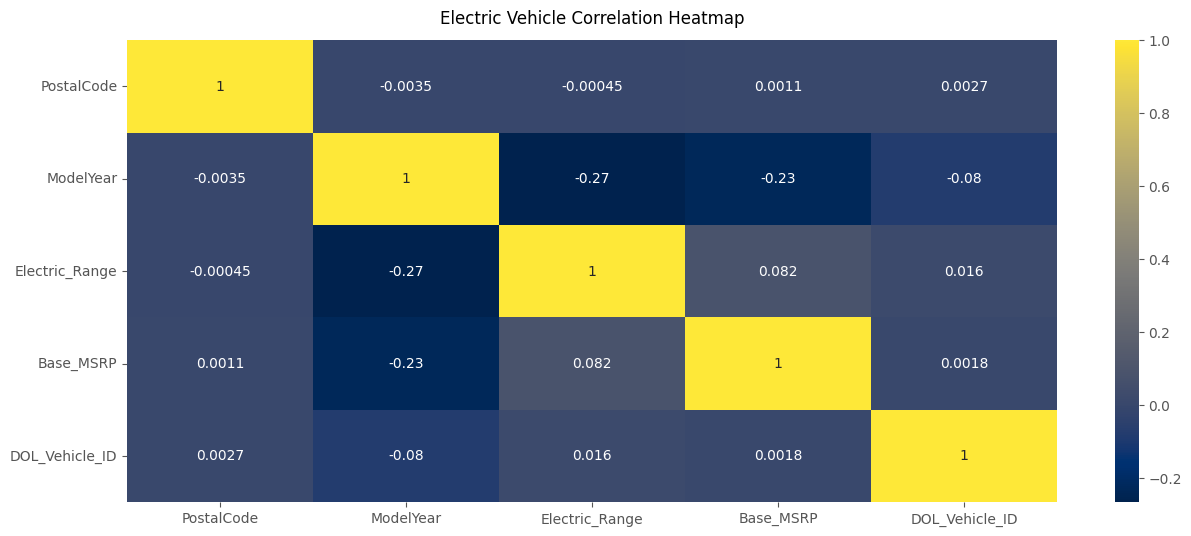

In [24]:
#checking the corrlation of all the attributes with target
plt.figure(figsize=(15, 6))
cmap = "cividis"
heatmap=sns.heatmap(df.corr(),cmap=cmap, annot=True)
heatmap.set_title('Electric Vehicle Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

> **Figure-1:** Provide us the visual correlation among the numerical attributes of the dataset

###  Observation Number 6

> The correlation plot provides us many insights as follow:
1. No strong correlation found among the attributes

### Distribution of numerical variables
- ModelYear, Electric_Range, Base_MSRP, DOL_Vehicle_ID

Text(0, 0.5, 'Count')

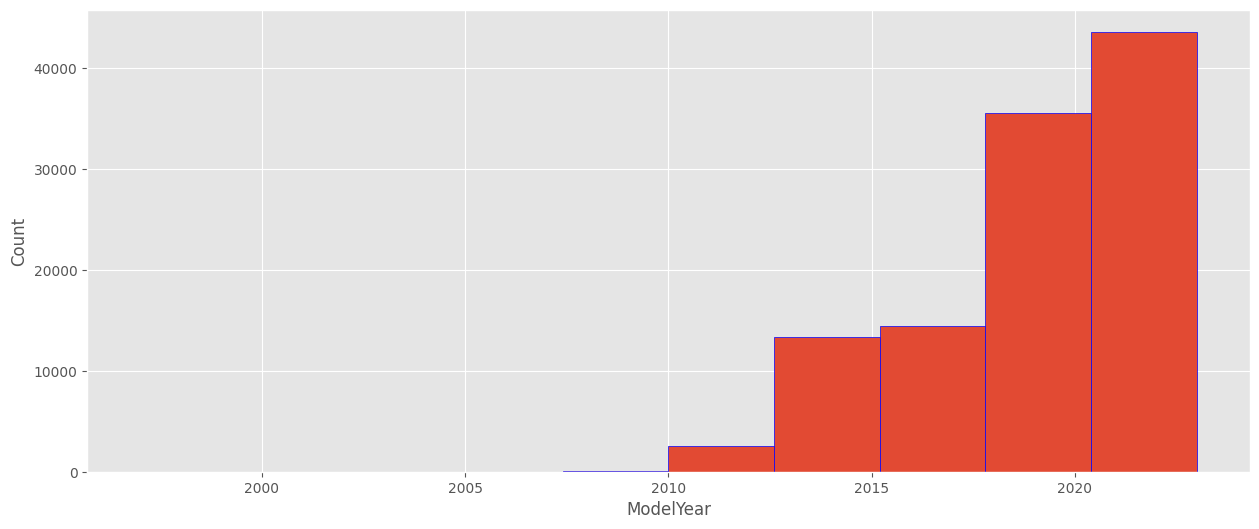

In [25]:
# Create a histogram of the PostalCode variable

plt.hist(df["ModelYear"],bins=10,edgecolor='blue')
plt.xlabel("ModelYear")
plt.ylabel("Count")

**Figure-2:** Histogram plot to check the normality and distribution of Model Year attribute

Text(0, 0.5, 'Count')

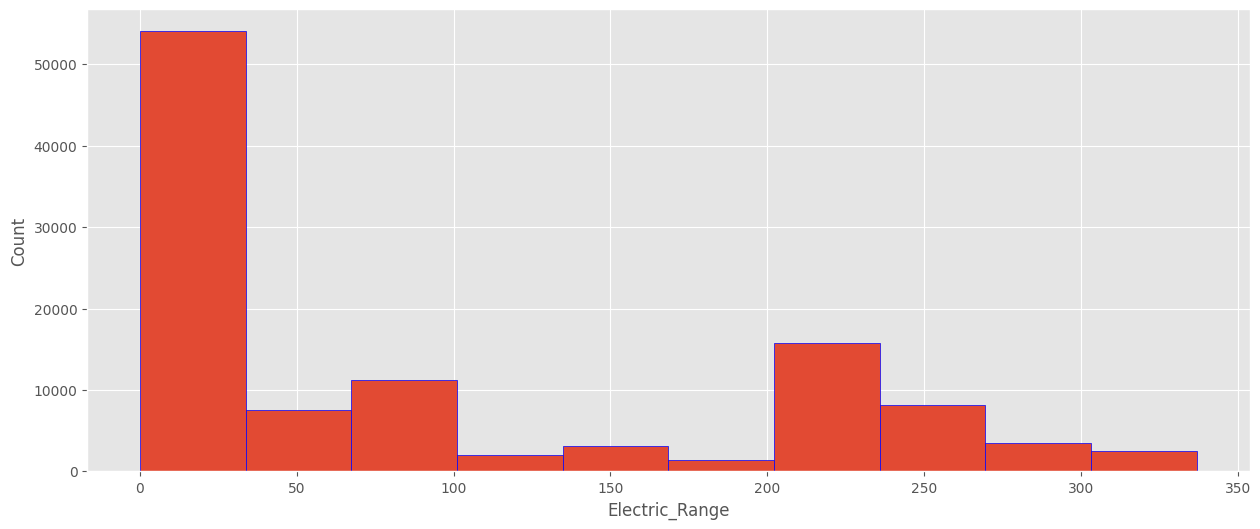

In [26]:

plt.hist(df["Electric_Range"],bins=10,edgecolor='blue')
plt.xlabel("Electric_Range")
plt.ylabel("Count")

**Figure-3:** Histogram plot to check the normality and distribution of Electric Range of the Cars in one charge

Text(0, 0.5, 'Count')

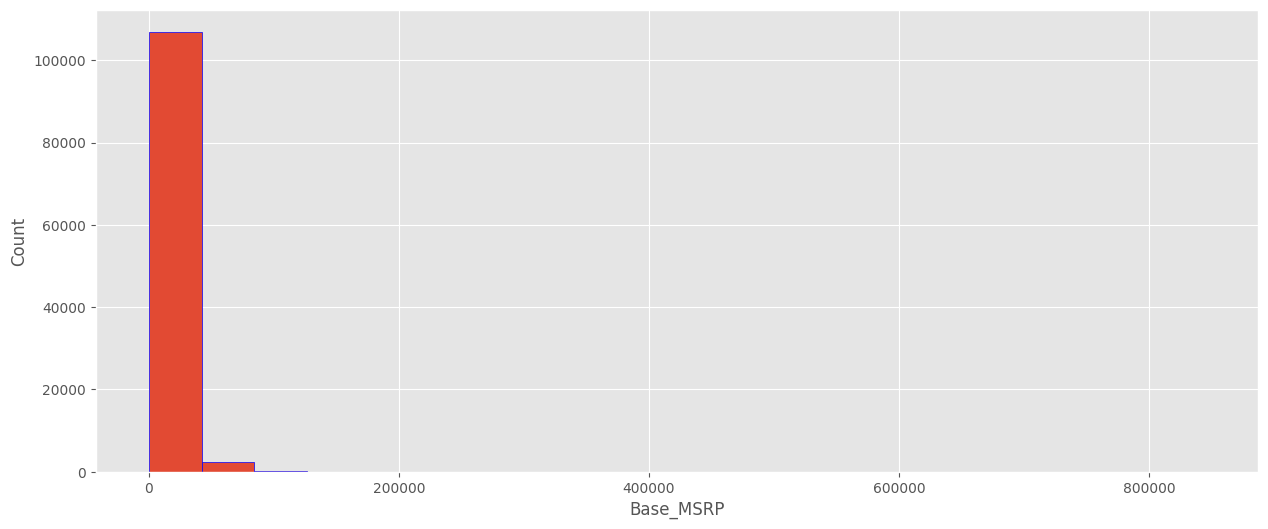

In [27]:
plt.hist(df["Base_MSRP"],bins=20,edgecolor='blue')
plt.xlabel("Base_MSRP")
plt.ylabel("Count")

**Figure-4:** Histogram plot to check the normality and distribution of Base MRP

Text(0, 0.5, 'Count')

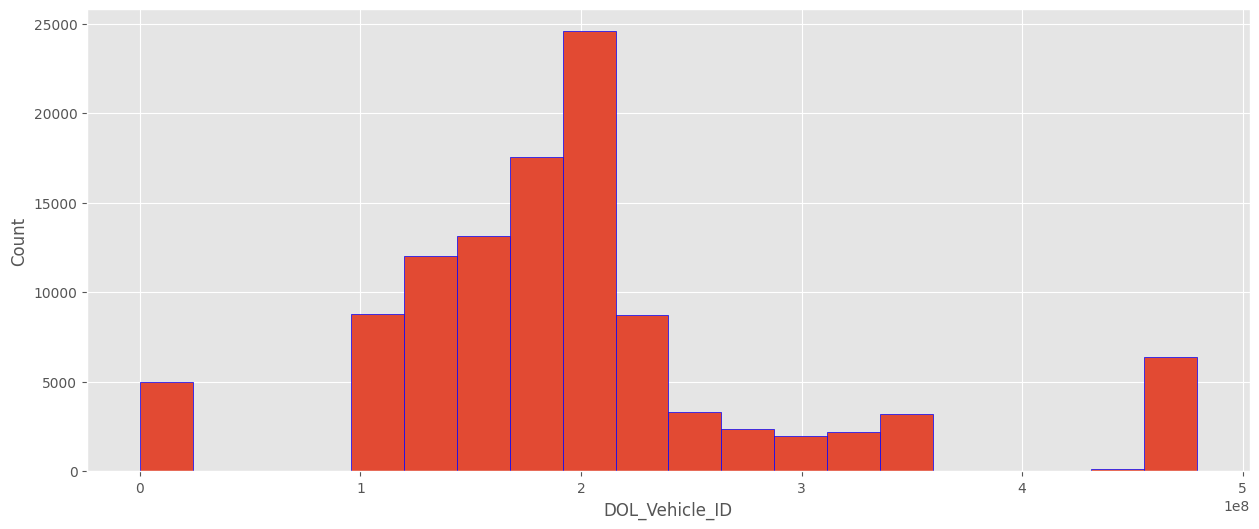

In [28]:


plt.hist(df["DOL_Vehicle_ID"],bins=20,edgecolor='blue')
plt.xlabel("DOL_Vehicle_ID")
plt.ylabel("Count")

**Figure-5:** Histogram plot to check the normality and distribution of DOL Vehicle ID

###  Observation Number 7

> From the histogram plots we can observe
1. Although the Base MSRP column is very important, however the vendors have not provided this information. Therefore we will drop it
2. The electric range colum of around 50K cars are not provided with legit information. Instead it is filled with zero

In [29]:
df['Base_MSRP'].unique()

array([     0,  31950,  69900,  34995,  59900,  32250,  33950,  39995,
        36900,  64950,  52900,  54950,  55700,  45600,  52650, 184400,
       110950,  44100,  75095,  36800,  43700, 102000,  98950,  90700,
        81100, 109000,  53400,  89100,  91250, 845000], dtype=int64)

In [30]:
df.drop('Base_MSRP', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109481 entries, 0 to 109480
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   VIN                    109481 non-null  object
 1   County                 109481 non-null  object
 2   City                   109481 non-null  object
 3   State                  109481 non-null  object
 4   PostalCode             109481 non-null  int32 
 5   ModelYear              109481 non-null  int64 
 6   Make                   109481 non-null  object
 7   Model                  109481 non-null  object
 8   Electric_Vehicle_Type  109481 non-null  object
 9   CAFV_Eligibility       109481 non-null  object
 10  Electric_Range         109481 non-null  int64 
 11  Legislative_District   109481 non-null  object
 12  DOL_Vehicle_ID         109481 non-null  int64 
 13  Vehicle_Location       109481 non-null  object
 14  Electric_Utility       109481 non-null  object
 15  

### Dealing with column Electric Utility
> We Can present the information stored in the Electric Utility: |, || ,Utility Not Avalilable and just one utility optionn  as:\
However, before any renaming. We will see the health of the attribute in terms of NULL values
- Not Available"
- Single Type Utilities"
- "Multi type Utilities"
- "Only One Option"

In [31]:
df['Electric_Utility'].unique()

array(['Utility Not Avalilable', 'PUD NO 1 OF CHELAN COUNTY',
       'PUGET SOUND ENERGY INC',
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)', 'PACIFICORP',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'PUD NO 2 OF GRANT COUNTY', 'AVISTA CORP',
       'MODERN ELECTRIC WATER COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF PACIFIC COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUGET SOUND ENERGY INC||PUD NO 1 OF JEFFERSON COUNTY',
       'PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PACIFICORP||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA -

In [32]:
def categorize_electric_utility(value):
    if value == "Utility Not Avalilable":
        return "Not Available"
    elif "||" in value:
        return "Multi type Utilities"
    elif "|" in value:
        return "Single Type Utilities"
    else:
        return "Only One Option"
    


df['Electric_Utility_Category'] = df['Electric_Utility'].apply(categorize_electric_utility)


In [33]:
df['Electric_Utility_Category'].unique()

array(['Not Available', 'Only One Option', 'Single Type Utilities',
       'Multi type Utilities'], dtype=object)

In [34]:
df.head(5)

,VIN,County,City,State,PostalCode,ModelYear,Make,Model,Electric_Vehicle_Type,CAFV_Eligibility,Electric_Range,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract,Electric_Utility_Category
0,3MW5P9J05N,Arapahoe,Englewood,CO,80111,2022,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,Unknown,200589147,POINT (-104.89239 39.61914),Utility Not Avalilable,8005006861.0,Not Available
1,5YJXCBE27J,Island,Greenbank,WA,98253,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,10.0,326880081,POINT (-122.575569 48.08489),Utility Not Avalilable,53029971302.0,Not Available
2,1N4AZ0CP3F,Kings,Lemoore,CA,93245,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,Unknown,182237457,POINT (-119.78637 36.30101),Utility Not Avalilable,6031980000.0,Not Available
3,5YJ3E1EA8J,San Diego,Oceanside,CA,92051,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,Unknown,153998050,Unknown,Utility Not Avalilable,6073018509.0,Not Available
4,5YJ3E1EB1K,Alameda,Berkeley,CA,94710,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,Unknown,320914072,POINT (-122.300531 37.869271),Utility Not Avalilable,6001423200.0,Not Available


### Dealing with column Legislative District

> The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.\
> We are going to drop his column as it is not important for our analysis

In [35]:
df['Legislative_District'].unique()

array(['Unknown', 10.0, 12.0, 32.0, 1.0, 2.0, 36.0, 34.0, 40.0, 21.0,
       44.0, 26.0, 39.0, 16.0, 23.0, 14.0, 38.0, 48.0, 13.0, 15.0, 9.0,
       46.0, 3.0, 37.0, 41.0, 11.0, 17.0, 19.0, 45.0, 18.0, 43.0, 5.0,
       24.0, 31.0, 33.0, 22.0, 49.0, 7.0, 35.0, 29.0, 20.0, 28.0, 25.0,
       27.0, 4.0, 8.0, 47.0, 30.0, 6.0, 42.0], dtype=object)

In [36]:
df.drop('Legislative_District', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109481 entries, 0 to 109480
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   VIN                        109481 non-null  object
 1   County                     109481 non-null  object
 2   City                       109481 non-null  object
 3   State                      109481 non-null  object
 4   PostalCode                 109481 non-null  int32 
 5   ModelYear                  109481 non-null  int64 
 6   Make                       109481 non-null  object
 7   Model                      109481 non-null  object
 8   Electric_Vehicle_Type      109481 non-null  object
 9   CAFV_Eligibility           109481 non-null  object
 10  Electric_Range             109481 non-null  int64 
 11  DOL_Vehicle_ID             109481 non-null  int64 
 12  Vehicle_Location           109481 non-null  object
 13  Electric_Utility           109481 non-null  

# Question and Aswers
> We are going to pose following questions against the dataset:

1. What are the Top 10 count of cars per county?
2. What are the Top 10 count of cars per city?
3. What are the Top 10 count of cars per state?
4. What are the Top 10 count of cars per postal code?
5. What are the Top 10 Make distribution count per top 10 County?
6. What are the Top 10 Make distribution count per top 10 City?
7. What are the Top 10 Make distribution count per top 10 State?
8. What are the EVT Distribution count per state?
9. What are the Electric Utility Distribution in top 10 cities with highest number of cars?
10. What are the Top 5 vs Bottom 5 Comparison?
11. What are the Distances Travel by vehicle make per electric charge?
12. What are the Year Wise Cars sales growth?
13. Plotting the lat and lon

Question 1. What are the Top 10 count of cars per county?

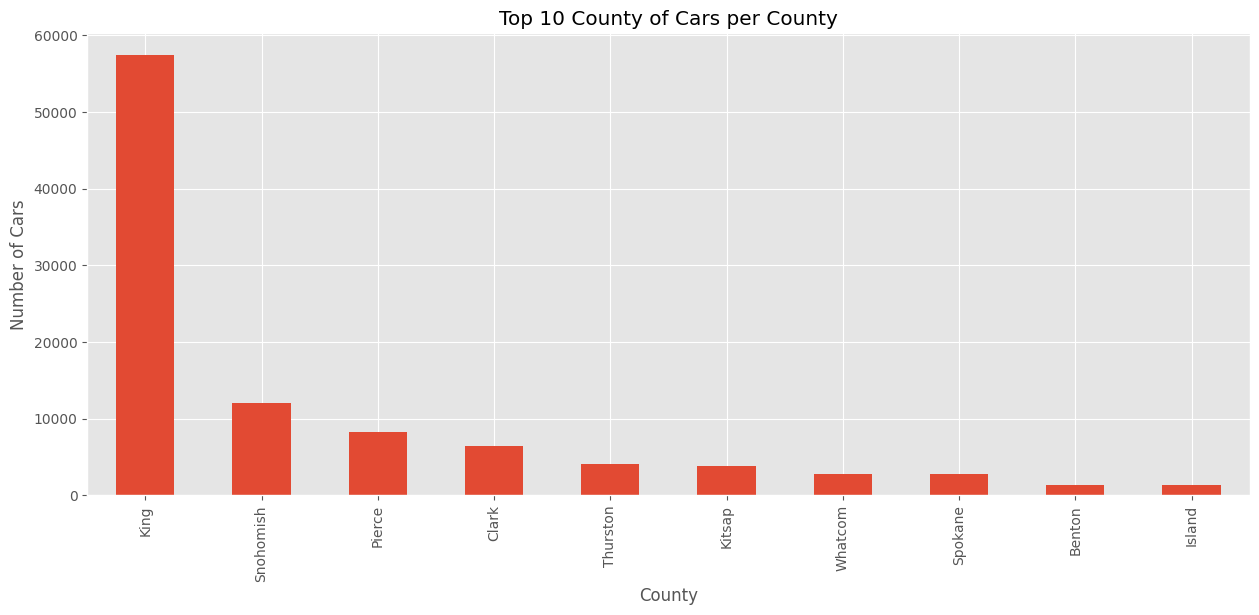

,County
King,57398
Snohomish,12022
Pierce,8216
Clark,6460
Thurston,4035
Kitsap,3774
Whatcom,2767
Spokane,2719
Benton,1329
Island,1281


In [37]:
car_counts = df['County'].value_counts().nlargest(10)

# plot the counts
car_counts.plot(kind='bar')
plt.xlabel('County')
plt.ylabel('Number of Cars')
plt.title('Top 10 County of Cars per County')
plt.show()

car_counts_df = car_counts.to_frame()
car_counts_df.style.background_gradient(cmap='Blues')

**Figure-6:** Plot showing top-10 counties with count of cars

Answer 1. King county with 57K cars stands at the top

Question 2. What are the Top 10 count of cars per city?

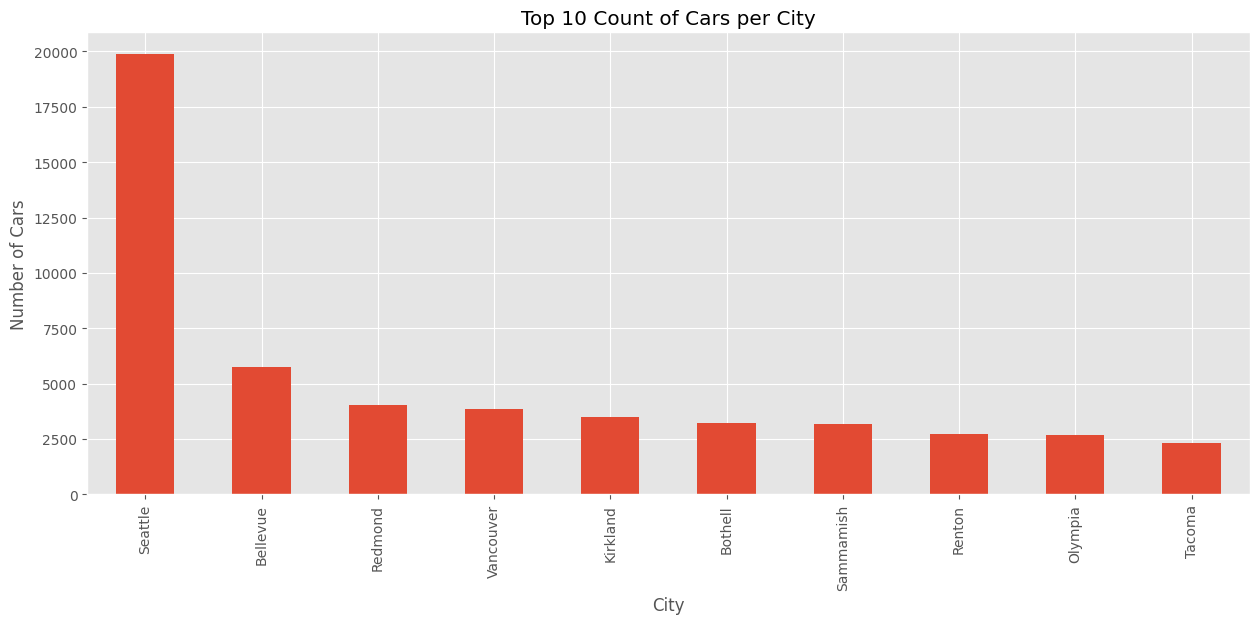

,City
Seattle,19860
Bellevue,5751
Redmond,4044
Vancouver,3875
Kirkland,3486
Bothell,3210
Sammamish,3172
Renton,2725
Olympia,2677
Tacoma,2303


In [38]:
car_counts_Cty = df['City'].value_counts().nlargest(10)

# plot the counts
car_counts_Cty.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Cars')
plt.title('Top 10 Count of Cars per City')
plt.show()


car_counts_cty_df = car_counts_Cty.to_frame()
car_counts_cty_df.style.background_gradient(cmap='Blues')

**Figure-7:** Plot showing top-10 Top 10 count of cars per city

Answer 2. Seattle stood at the top,. Due to high number of tech giants and their employee living there

Question 3. What are the Top 10 count of cars per state?

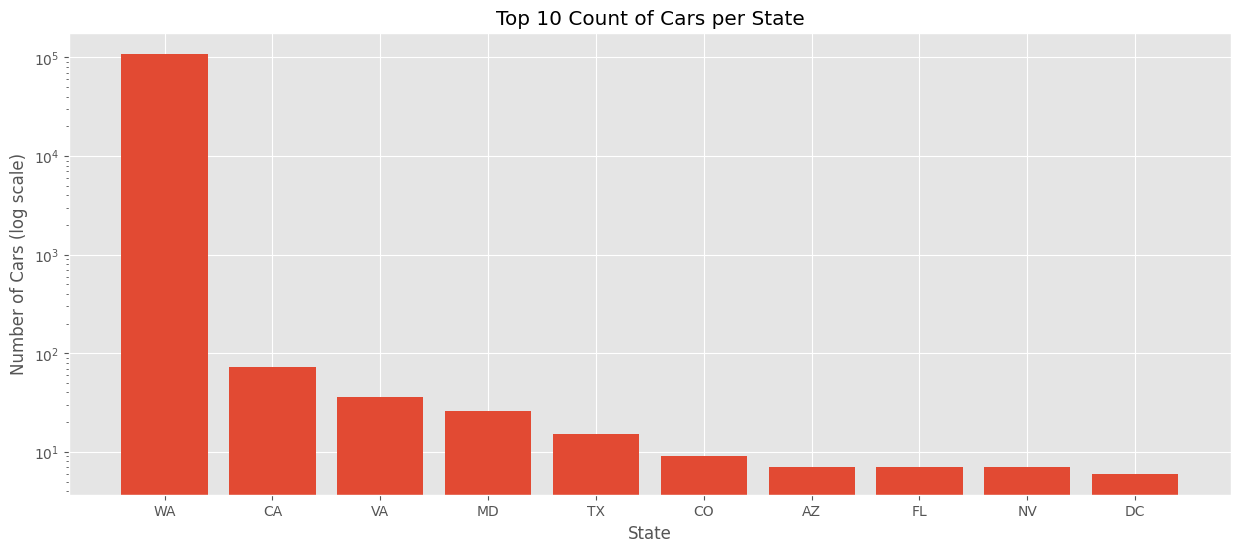

,State
WA,109205
CA,72
VA,36
MD,26
TX,15
CO,9
AZ,7
FL,7
NV,7
DC,6


In [39]:
car_counts_St = df['State'].value_counts().nlargest(10)

# plot the counts with a logarithmic y-axis
plt.bar(car_counts_St.index, car_counts_St.values)
plt.yscale('log')
plt.xlabel('State')
plt.ylabel('Number of Cars (log scale)')
plt.title('Top 10 Count of Cars per State')
plt.show()


car_counts_St_df = car_counts_St.to_frame()
car_counts_St_df.style.background_gradient(cmap='Blues')

**Figure-8:** Plot showing Top 10 count of cars per state

Answer 3. Washington as a state has the heighest number of cars

Question 4. What are the Top 10 count of cars per postal code?

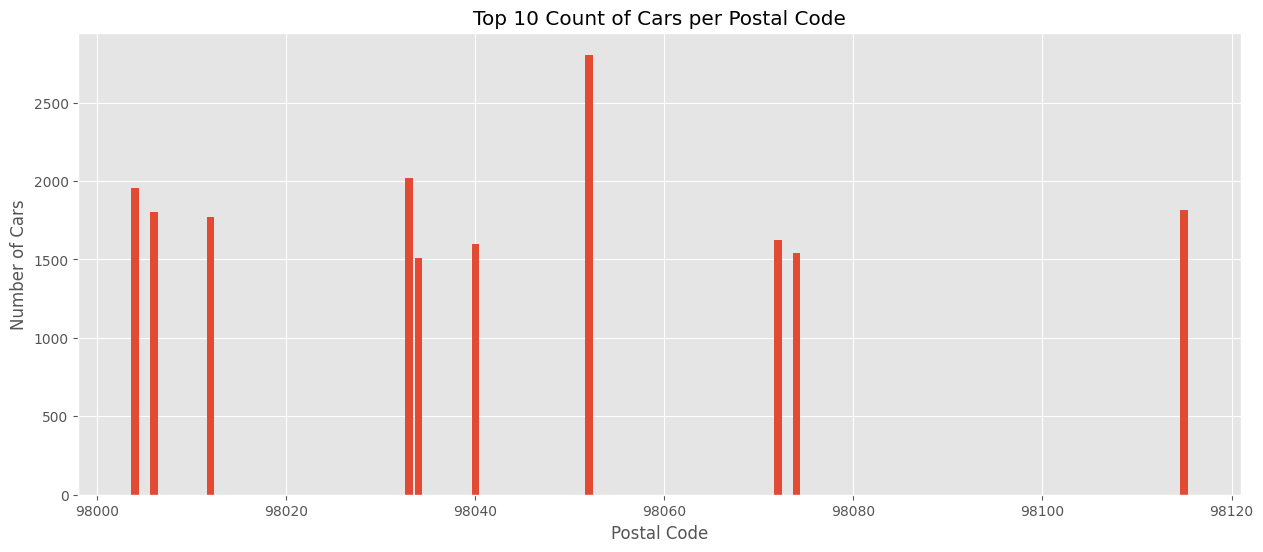

,PostalCode
98052,2805
98033,2019
98004,1953
98115,1815
98006,1800
98012,1772
98072,1626
98040,1600
98074,1539
98034,1506


In [43]:
car_counts_pc = df['PostalCode'].value_counts().nlargest(10)

# plot the counts with a logarithmic y-axis
plt.bar(car_counts_pc.index, car_counts_pc.values)
#plt.yscale('log')
plt.xlabel('Postal Code')
plt.ylabel('Number of Cars')
plt.title('Top 10 Count of Cars per Postal Code')
plt.show()

car_counts_pc_df = car_counts_pc.to_frame()
car_counts_pc_df.style.background_gradient(cmap='Blues')

**Figure-9:** Plot showing Top 10 count of cars per postal code

Answer 4. This provide us more insight for other marketing purposes and upselling opportunities

Question 5. What are the Top 10 Make distribution count per top 10 County?

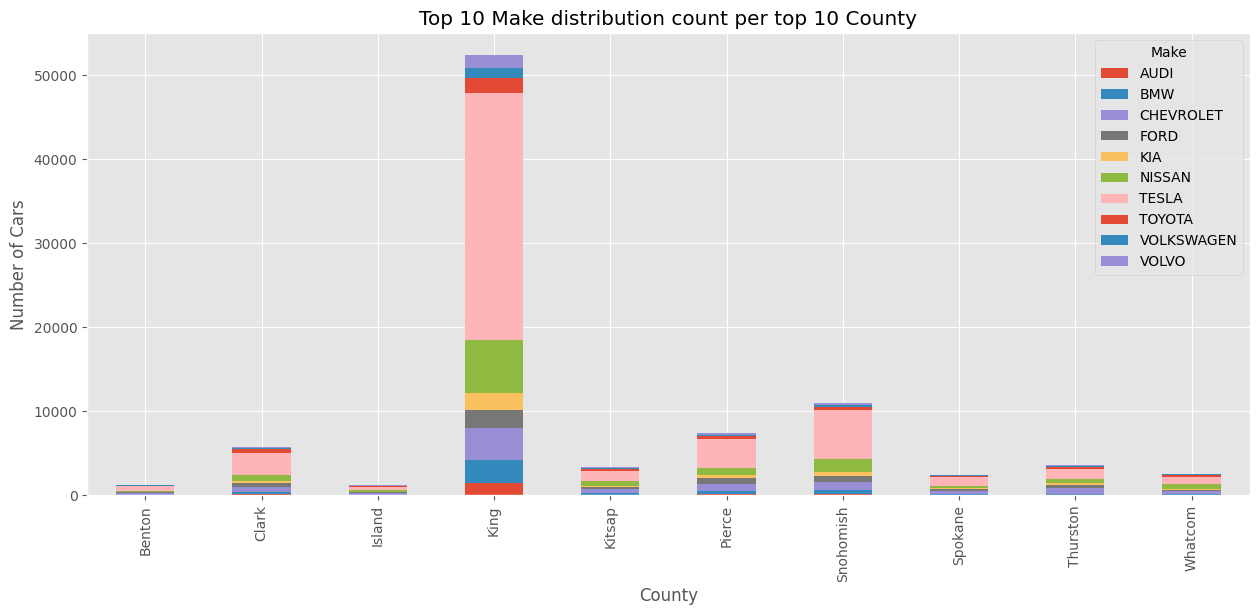

Make,AUDI,BMW,CHEVROLET,FORD,KIA,NISSAN,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
County,,,,,,,,,,
Benton,26,51,195,113,43,112,538,76,21,10
Clark,104,253,662,382,271,761,2591,439,121,109
Island,30,37,192,87,68,148,469,65,38,28
King,1402,2789,3848,2132,1990,6298,29407,1734,1276,1472
Kitsap,84,166,454,240,187,583,1222,173,97,118


In [44]:
cnt_MkCounty = df.groupby(['County', 'Make']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data = cnt_MkCounty.groupby(['County', 'Make'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
county_counts = grouped_data.groupby('County')['Count'].sum().reset_index()
make_counts = grouped_data.groupby('Make')['Count'].sum().reset_index()


# Sort the counties by count in descending order, and select the top 10
top_counties = county_counts.sort_values(by='Count', ascending=False).head(10)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)


# Filter the data to only include the top 10 counties
filtered_data = grouped_data[grouped_data['County'].isin(top_counties['County']) & grouped_data['Make'].isin(top_makes['Make'])]


# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data = filtered_data.pivot(index='County', columns='Make', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Top 10 Make distribution count per top 10 County')
plt.xlabel('County')
plt.ylabel('Number of Cars')

# Show the plot
plt.show()


pivoted_data.head()



**Figure-10:** Plot showing  Top 10 Make distribution count per top 10 County

Answer 5. Here we presents the top 10 counties with top 10 consumed make. It is clearly shown that TESLA is the number one choice & Nissan is the second in line

Question 6 What are the Top 10 Make distribution count per top 10 City?

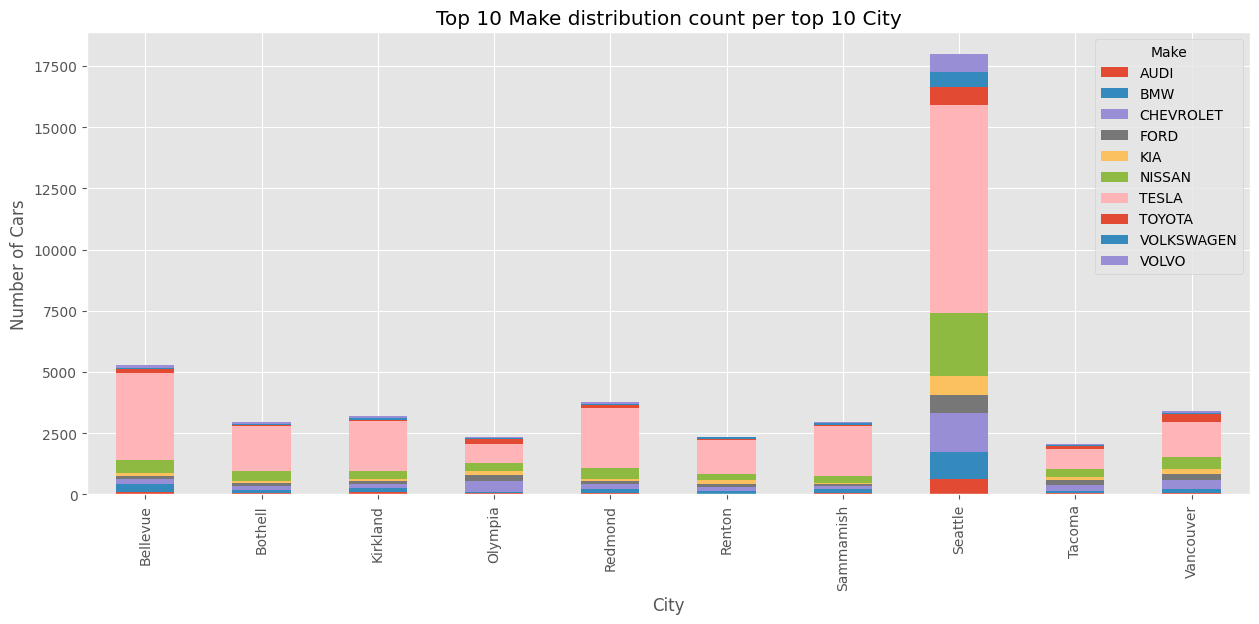

Make,AUDI,BMW,CHEVROLET,FORD,KIA,NISSAN,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
City,,,,,,,,,,
Bellevue,120,294,211,128,131,536,3558,138,71,114
Bothell,49,121,177,119,98,377,1842,65,44,63
Kirkland,94,176,170,90,118,311,2032,67,64,99
Olympia,48,71,451,208,174,354,771,171,58,40
Redmond,70,169,190,105,111,449,2439,102,73,71


In [45]:
cnt_MkCity = df.groupby(['City', 'Make']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data_cty = cnt_MkCity.groupby(['City', 'Make'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
city_counts = grouped_data_cty.groupby('City')['Count'].sum().reset_index()
make_counts = grouped_data_cty.groupby('Make')['Count'].sum().reset_index()


# Sort the counties by count in descending order, and select the top 10
top_cities = city_counts.sort_values(by='Count', ascending=False).head(10)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)


# Filter the data to only include the top 10 counties
filtered_data_Cty = grouped_data_cty[grouped_data_cty['City'].isin(top_cities['City']) & grouped_data_cty['Make'].isin(top_makes['Make'])]


# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data_cty = filtered_data_Cty.pivot(index='City', columns='Make', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data_cty.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Top 10 Make distribution count per top 10 City')
plt.xlabel('City')
plt.ylabel('Number of Cars')

# Show the plot
plt.show()


pivoted_data_cty.head()



**Figure-11:** Plot showing Top 10 Make distribution count per top 10 City

Answer 6. Here we presents the top 10 cities with top 10 consumed makes. It is clearly shown that TESAL is the number one choice & Nissan is the second in line. Seattle is the city with heighest number of cars

Question 7 What are the Top 10 Make distribution count per top 10 State?

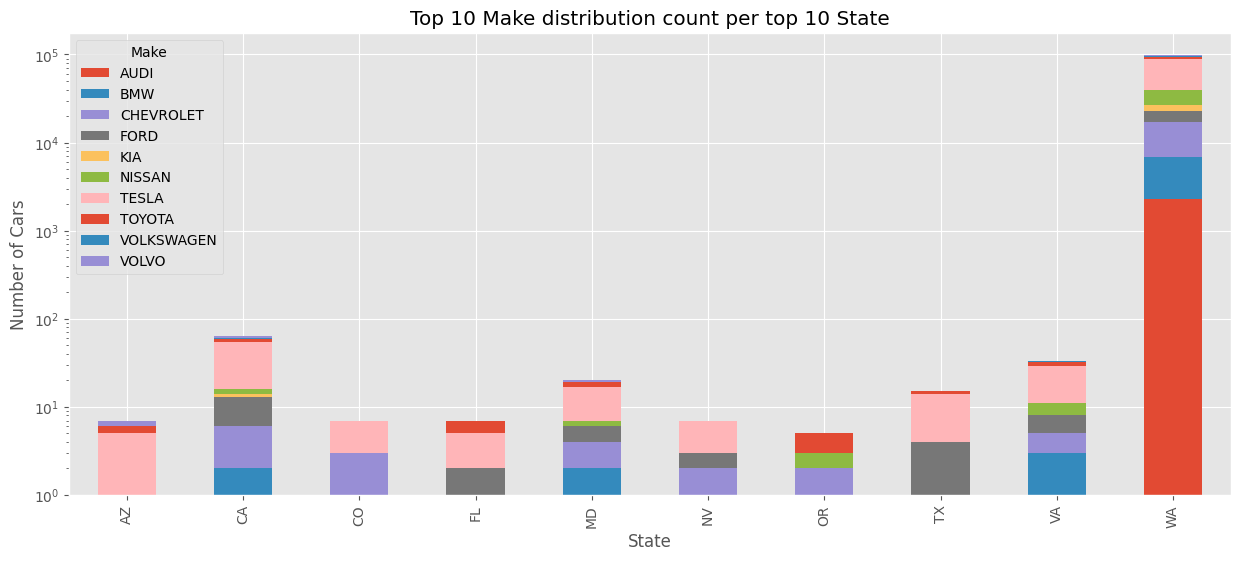

Make,AUDI,BMW,CHEVROLET,FORD,KIA,NISSAN,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
State,,,,,,,,,,
AZ,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,1.0
CA,1.0,1.0,4.0,7.0,1.0,2.0,38.0,5.0,2.0,3.0
CO,0.0,1.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
FL,0.0,0.0,0.0,2.0,0.0,0.0,3.0,2.0,0.0,0.0
MD,1.0,1.0,2.0,2.0,0.0,1.0,10.0,2.0,0.0,1.0
NV,0.0,0.0,2.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0
OR,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
TX,0.0,0.0,0.0,4.0,0.0,0.0,10.0,1.0,0.0,0.0
VA,0.0,3.0,2.0,3.0,0.0,3.0,18.0,3.0,1.0,0.0


In [46]:
cnt_Mk_St = df.groupby(['State', 'Make']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data_St = cnt_Mk_St.groupby(['State', 'Make'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
st_counts = grouped_data_St.groupby('State')['Count'].sum().reset_index()
make_counts = grouped_data_St.groupby('Make')['Count'].sum().reset_index()


# Sort the counties by count in descending order, and select the top 10
top_States = st_counts.sort_values(by='Count', ascending=False).head(10)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)


# Filter the data to only include the top 10 counties
filtered_data_St = grouped_data_St[grouped_data_St['State'].isin(top_States['State']) & grouped_data_St['Make'].isin(top_makes['Make'])]


# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data_St = filtered_data_St.pivot(index='State', columns='Make', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data_St.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Top 10 Make distribution count per top 10 State')
plt.yscale('log')
plt.xlabel('State')
plt.ylabel('Number of Cars')

# Show the plot
plt.show()


pivoted_data_St.head(10)



**Figure-12:** Plot showing Top 10 Make distribution count per top 10 State

Answer 7. Washington clearly is the biggest consumer in compariosn to all other states.
One more observation is that there is big marketing opportunity for Car vendors like AUDI, BMW, in other states

Question 8. What are the EVT Distribution count per state?

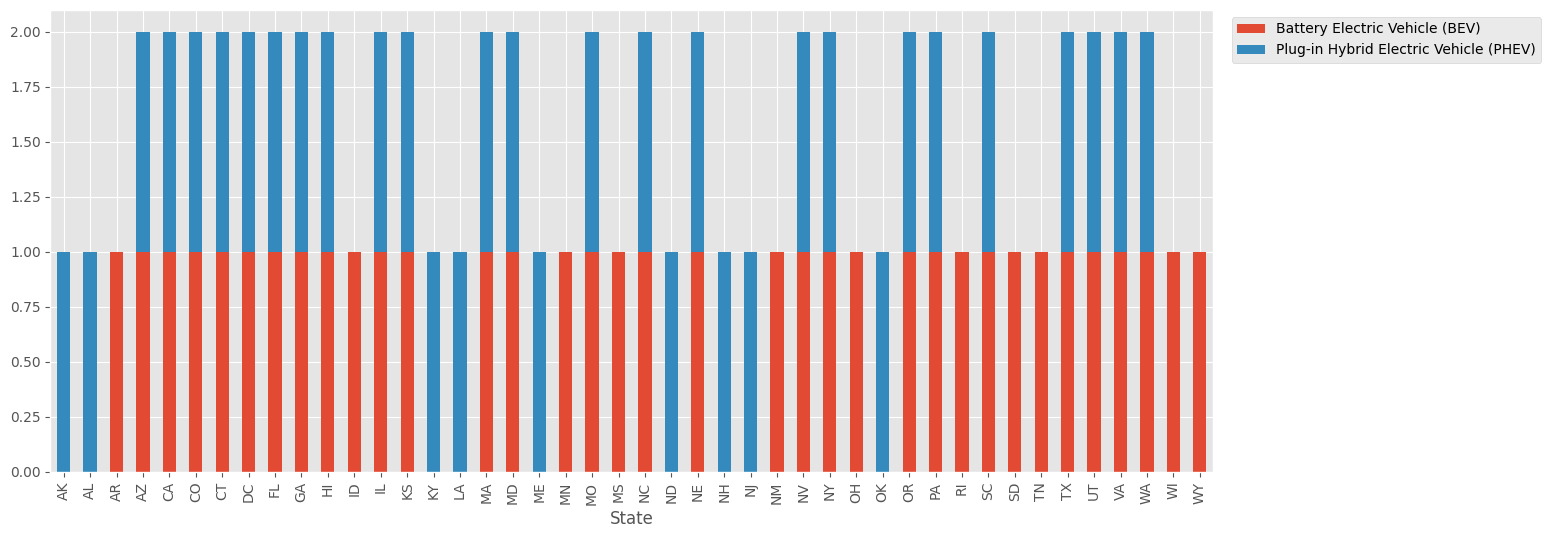

,State,Electric_Vehicle_Type,Count
5,CA,Battery Electric Vehicle (BEV),47
6,CA,Plug-in Hybrid Electric Vehicle (PHEV),25
7,CO,Battery Electric Vehicle (BEV),7
3,AZ,Battery Electric Vehicle (BEV),5
2,AR,Battery Electric Vehicle (BEV),3
4,AZ,Plug-in Hybrid Electric Vehicle (PHEV),2
8,CO,Plug-in Hybrid Electric Vehicle (PHEV),2
0,AK,Plug-in Hybrid Electric Vehicle (PHEV),1
1,AL,Plug-in Hybrid Electric Vehicle (PHEV),1
9,CT,Battery Electric Vehicle (BEV),1


In [47]:
## EVT Distribution count per state
evt_Dis_cnt = df.groupby(['State', 'Electric_Vehicle_Type']).size().reset_index(name='Count')
evt_Dis_cnt.groupby(['State', 'Electric_Vehicle_Type'])['Count'].count().unstack().plot(kind='bar', stacked=True)

# Move legend outside of plot
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

plt.show()

evt_Dis_cnt.head(10).sort_values(by='Count', ascending=False)


**Figure-13:** Plot showing EVT Distribution count per state

Answer 8. Very useful insights from amrketing POV., there is a high potential of BEV's makers to promote BEVs in states like AK & AL.,
On the other side Arizona has a big market waiting for PHEV vehicles

Question 9.  What are the Electric Utility Distribution in top 10 cities with highest number of cars?

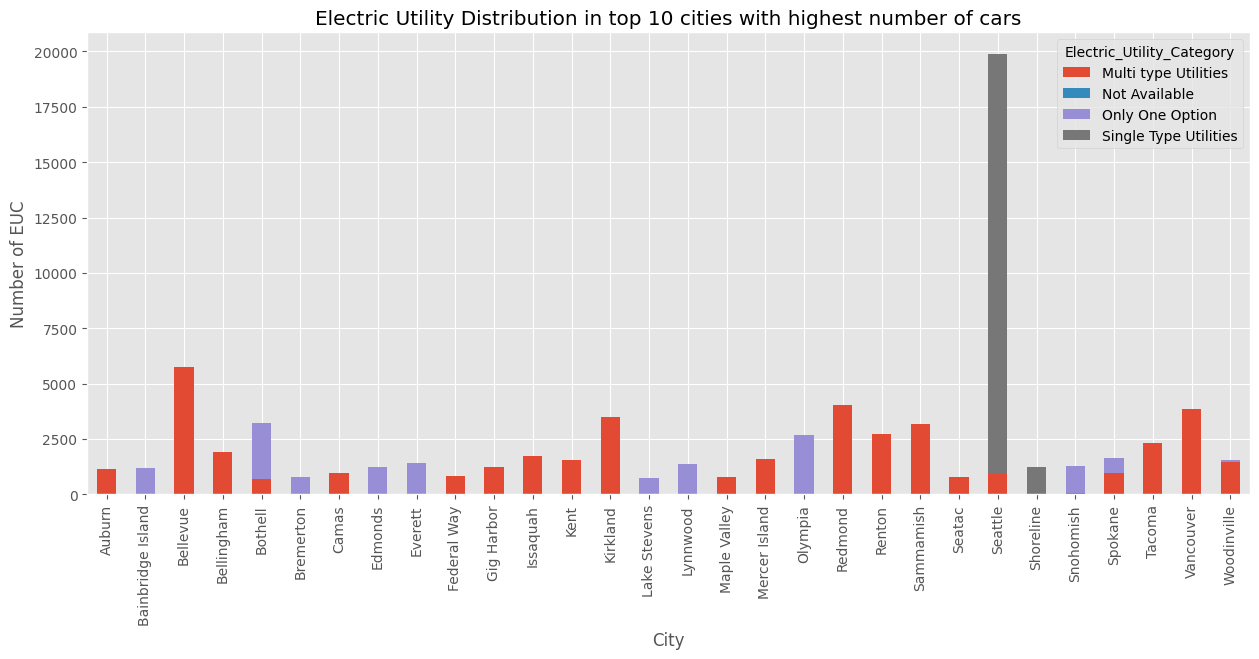

Electric_Utility_Category,Multi type Utilities,Not Available,Only One Option,Single Type Utilities
City,,,,
Auburn,1131.0,0.0,0.0,0.0
Bainbridge Island,0.0,12.0,1191.0,0.0
Bellevue,5750.0,1.0,0.0,0.0
Bellingham,1898.0,0.0,7.0,0.0
Bothell,710.0,0.0,2500.0,0.0
Bremerton,0.0,0.0,797.0,0.0
Camas,984.0,0.0,0.0,0.0
Edmonds,0.0,3.0,1257.0,0.0
Everett,2.0,0.0,1423.0,0.0


In [48]:
cnt_Cty_EUD = df.groupby(['City', 'Electric_Utility_Category']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data_Cty_EUD = cnt_Cty_EUD.groupby(['City', 'Electric_Utility_Category'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
Cty_EUD_counts = grouped_data_Cty_EUD.groupby('City')['Count'].sum().reset_index()
# make_counts = grouped_data_St.groupby('Make')['Count'].sum().reset_index()


# Sort the counties by count in descending order, and select the top 10
top_Cty_EUD_counts = Cty_EUD_counts.sort_values(by='Count', ascending=False).head(30)
# top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)


# Filter the data to only include the top 10 counties
filtered_data_Cty_EUD = grouped_data_Cty_EUD[grouped_data_Cty_EUD['City'].isin(top_Cty_EUD_counts['City'])]


# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data_Cty_EUD = filtered_data_Cty_EUD.pivot(index='City', columns='Electric_Utility_Category', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data_Cty_EUD.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Electric Utility Distribution in top 10 cities with highest number of cars')
# plt.yscale('log')
plt.xlabel('City')
plt.ylabel('Number of EUC')

# Show the plot
plt.show()


pivoted_data_Cty_EUD.head(10)



**Figure-14:** Plot showing Electric Utility Distribution in top 10 cities with highest number of cars

Answer 9. Seattle has a big market opportunity for other utiilites offering

Question 10.  What are the Top 5 vs Bottom 5 Comparison?

Text(0.5, 1.0, 'Bottom 5 Cars')

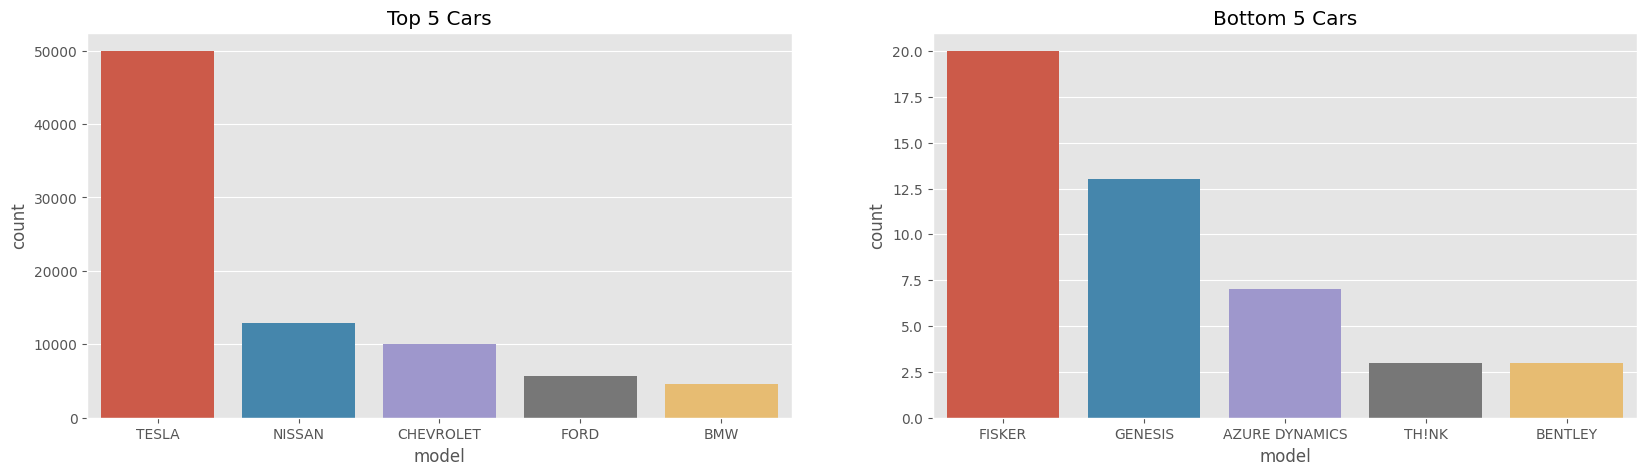

In [49]:
car_market_share = pd.DataFrame(df.groupby('Make')['VIN'].count().reset_index()).sort_values(by='VIN',ascending=False).reset_index(drop=True)
car_market_share.columns = ['model','count']
car_market_share_top_5 = car_market_share.head(5)
car_market_share_bottom_5 = car_market_share.tail(5)

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(data=car_market_share_top_5, x="model", y="count",ax=axes[0])
sns.barplot(data=car_market_share_bottom_5, x="model", y="count",ax=axes[1])
axes[0].set_title('Top 5 Cars')
axes[1].set_title('Bottom 5 Cars')

**Figure-15:** Plot showing Top 5 vs Bottom 5 Comparison

Answer 10. TESLA is the market leader by large. However, Bentley being the expensive brand in luxury cars is struggling inthe Electric car market

Question 11. What are the Distances Travel by vehicle make per electric charge?

In [50]:
import plotly.express as ps
km_range = pd.DataFrame(df.groupby('Make')['Electric_Range'].mean().reset_index()).sort_values(by='Electric_Range',ascending=False).reset_index(drop=True).head(10)
km_range.columns = ['model','km_range']
ps.pie(data_frame=km_range, names='model', values='km_range', hover_name='km_range',title='Top 10 Model with KM range',hole=True)

**Figure-16:** Plot showing Distances Travel by vehicle make per electric charge

Answer 11. Now here is an interesting insight. TESLA being the market leader is far behind when it comes to distance travelled by its vehicles per charge

Question 12. What are the Year Wise Cars sales growth?

In [51]:
# Year Wise Cars
year_wise_cars = df.groupby('ModelYear')['VIN'].count().reset_index()
year_wise_cars.columns = ['year','num_cars']

fig = ps.line(year_wise_cars,x="year", y="num_cars", title='Year Wise Number of Cars',markers=True)
fig.show()

**Figure-17:** Plot showing Year Wise Cars sales growth of EVs

In [52]:
year_wise_cars.sort_values(by='num_cars', ascending=False).head(10)

,year,num_cars
18,2022,24728
17,2021,18409
14,2018,14313
16,2020,11048
15,2019,10173
13,2017,8656
12,2016,5758
11,2015,4957
9,2013,4708
10,2014,3680


Answer 12. We can see the market trust in electric vehicles started to built up after 2010.
The demand of electric vehicles is ever since going high.

There is a drop observed in 2019, when mainlly there was a gap in supply & demand. due to COVID-19 lockdowns

Question 13. Plotting the lat and lon

In [54]:
df['lat'] = df['Vehicle_Location'].str.split(' ').str[1].str.split('(').str[1].astype(float)
df['lon'] = df['Vehicle_Location'].str.split(' ').str[2].str.split(')').str[0].astype(float)
df['lat'] = df['lat'].fillna(0)
df['lon'] = df['lon'].fillna(0)

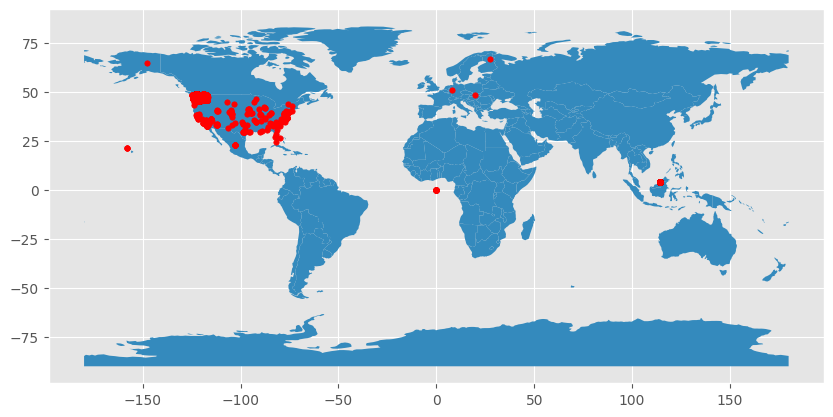

In [55]:
geometry = [Point(xy) for xy in zip(df['lat'], df['lon'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

# Summary & Conclusion
---
The Electric Vehicle Population dataset contains information on Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) registered through Washington State Department of Licensing (DOL). Through exploratory data analysis, the top 10 counts of cars per county, city, state, and postal code were determined. King County had the most cars registered, followed by Snohomish and Pierce counties. Seattle had the most cars registered by city, followed by Bellevue and Redmond. Washington had the most cars registered by state, followed by California and Virginia. 

The dataset also provided insight into the top 10 consumed car makers by county, city, and state, with Tesla being the most popular make overall. There appears to be an opportunity for car vendors like Audi and BMW to market their vehicles in other states. 
The top 10 postal codes were also identified, providing further insight for marketing and upselling opportunities.

To Conclude:

- King county has the highest number of electric cars registered with 57,398 cars, followed by Snohomish and Pierce county.
- Seattle is the city with the highest number of electric cars with 19,860 cars, followed by Bellevue and Redmond.
- Washington state has the highest number of electric cars with 109,205 cars, followed by California, Virginia, and Maryland.
- The top 10 postal codes with the highest number of electric cars are in the Seattle metro area, with 98052 having the most with 2,805 cars.
- Tesla is the most popular electric car make in Washington state, followed by Nissan, Chevrolet, and Toyota.
- Tesla is also the most popular make in Seattle, followed by Nissan, Chevrolet, and BMW.
- Washington state has the highest number of Audi, BMW, and Chevrolet electric cars registered among all states.
- There is a big marketing opportunity for car vendors like Audi, BMW, and Chevrolet in other states, such as Arizona, Florida, and Colorado.



# Relevant Hashtags
- #electronics
- #Enregy
- #Electricity
- Engineering
- #ElectricCars
- #CAFV
- #HouseBill2042
- #GEOID